# Day057
## 階層分群算法(Hierarchical clustering)
> 從所有資料點開始，視每筆資料為一個 cluster，依序將兩個距離最近的 cluster 合併為同一個 cluster。最後只剩下一個 cluster 時，算法結束。
<img src="https://jocelyn-ong.github.io/images/hclustering/dendrogram.png" width=400 height=400>

### 階層分群可根據定義距離來分群(bottom-up)，也可以決定群數做分群 (top-down)
### 階層分群距離計算方式(Linkage):
1. Complete: 以兩cluster內相距最遠的點作為距離。
2. Single: 以兩cluster內相距最近的點作為距離。
3. Average: 以兩cluster內所有點間距的平均值作為距離。
> 通常會使用Complete跟Average，除了歐式距離，有時也會用相關係數來當作分群標準，稱為Dissimilarity meansure

### 階層分群優劣分析
- 優點:
    1. 概念簡單
    2. 不須指定群數
- 缺點:
    1.只適用於少量資料，大量資料會很難處理

### Clustering注意事項:
1. Variable是否需要Scaling?
2. 要選擇幾個cluster?
3. 哪些feature要用來決定分群?

## 範例
#### 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

#### 載入 toy example 資料集

In [2]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

#### 設定 模型 估計參數
1. ward minimizes the variance of the clusters being merged.
2. complete or maximum linkage uses the maximum distances between all observations of the two sets.
3. average uses the average of the distances of each observation of the two sets.

In [3]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage='ward')),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete')),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage='average'))]

#### 資料建模 並 視覺化 結果

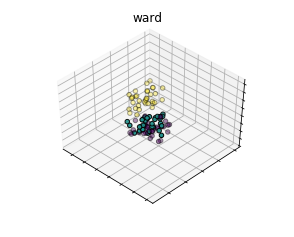

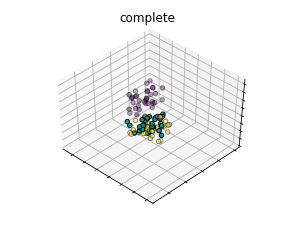

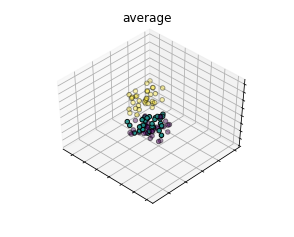

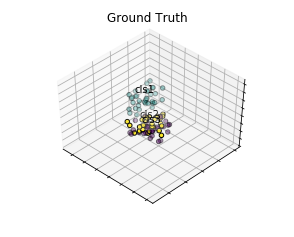

In [4]:
fignum = 1
titles = ['ward', 'complete', 'average']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    # fit data
    est.fit(X)
    
    labels = est.labels_
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
              c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4,3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls1', 0),
                    ('cls2', 1),
                    ('cls3', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12    

# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

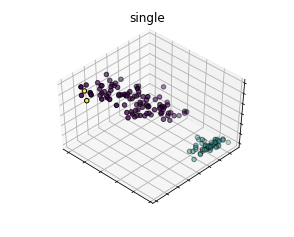

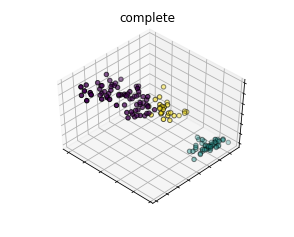

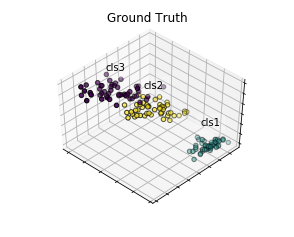

In [6]:
estimators = [('hc_single', AgglomerativeClustering(n_clusters=3, linkage='single')),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete'))]


fignum = 1
titles = ['single', 'complete', 'average']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    # fit data
    est.fit(X)
    
    labels = est.labels_
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
              c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4,3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls1', 0),
                    ('cls2', 1),
                    ('cls3', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12    